In [62]:
import tensorflow as tf
import numpy as np

In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
train_path = '/content/gdrive/MyDrive/CV-TF1.X-2.X/CV-TF1.X-2.X/data/covid19/train'
test_path = '/content/gdrive/MyDrive/CV-TF1.X-2.X/CV-TF1.X-2.X/data/covid19/test'

In [65]:
batch_size = 32
img_height = img_width = 100

In [66]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_path, image_size=(img_width, img_height), label_mode='int', batch_size=batch_size)

Found 251 files belonging to 3 classes.


In [67]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=(img_width, img_height), label_mode='int', batch_size=batch_size)

Found 66 files belonging to 3 classes.


In [68]:
train_ds.prefetch(1)

<PrefetchDataset shapes: ((None, 100, 100, 3), (None,)), types: (tf.float32, tf.int32)>

In [69]:
class_names = train_ds.class_names

In [70]:
num_classes = len(class_names)
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


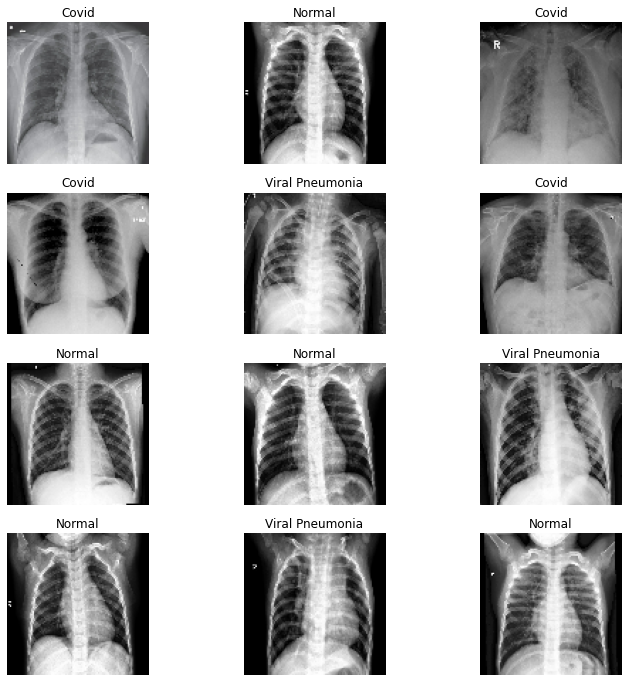

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for img, label in val_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [72]:
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
zoom_layer = tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.1, 0.3), width_factor=(0.1, 0.3))
rot_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input

In [74]:
def get_model(num_classes):

  model = Sequential([
        Input(shape=(100, 100, 3)),
        norm_layer,
        zoom_layer,
        rot_layer,
        Conv2D(16, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Dropout(0.3),
        Conv2D(16, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),
        Dropout(0.3),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.AUTO),
                metrics=['accuracy'])
  
  return model

In [75]:
model = get_model(num_classes)

In [76]:
history = model.fit(train_ds, validation_data=val_ds, epochs=60, verbose=1)

Epoch 1/60
8/8 [==============================] - 6s 129ms/step - loss: 2.3611 - accuracy: 0.3705 - val_loss: 1.0994 - val_accuracy: 0.3030
Epoch 2/60
8/8 [==============================] - 5s 105ms/step - loss: 1.4026 - accuracy: 0.4940 - val_loss: 1.0956 - val_accuracy: 0.3939
Epoch 3/60
8/8 [==============================] - 4s 105ms/step - loss: 1.0942 - accuracy: 0.5259 - val_loss: 0.9854 - val_accuracy: 0.6061
Epoch 4/60
8/8 [==============================] - 4s 105ms/step - loss: 0.8006 - accuracy: 0.6414 - val_loss: 1.0125 - val_accuracy: 0.3939
Epoch 5/60
8/8 [==============================] - 4s 101ms/step - loss: 0.7184 - accuracy: 0.6972 - val_loss: 0.9679 - val_accuracy: 0.4697
Epoch 6/60
8/8 [==============================] - 4s 102ms/step - loss: 0.6160 - accuracy: 0.7211 - val_loss: 0.9425 - val_accuracy: 0.5455
Epoch 7/60
8/8 [==============================] - 4s 102ms/step - loss: 0.5711 - accuracy: 0.7490 - val_loss: 0.9265 - val_accuracy: 0.4848
Epoch 8/60
8/8 [====

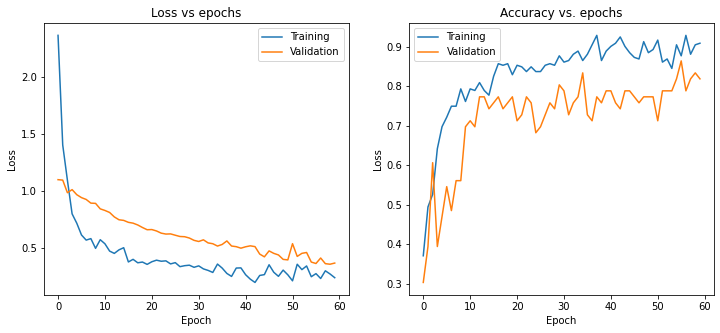

In [77]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='best')

fig.add_subplot(122)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'best')

plt.show()

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()

test_ds = test_datagen.flow_from_directory(test_path,
                                           target_size=(img_height, img_width),
                                           batch_size=1,
                                           class_mode = 'categorical',
                                           color_mode = 'rgb',
                                           shuffle=False,
                                           seed=2021)

Found 66 images belonging to 3 classes.


In [79]:
test_ds.reset()

predictions = model.predict(test_ds, steps=len(test_ds.filenames), verbose=1)

66/66 [==============================] - 2s 29ms/step


In [80]:
predictions

array([[9.66124296e-01, 2.13403944e-02, 1.25353318e-02],
       [9.99954700e-01, 9.61884962e-06, 3.55968259e-05],
       [9.26114082e-01, 2.92170160e-02, 4.46688458e-02],
       [7.16998160e-01, 4.42713648e-02, 2.38730520e-01],
       [7.10092664e-01, 5.89903630e-02, 2.30916917e-01],
       [9.87368882e-01, 6.89127948e-03, 5.73983602e-03],
       [9.88576949e-01, 8.39999877e-03, 3.02299298e-03],
       [9.59995985e-01, 2.25706771e-02, 1.74334180e-02],
       [9.94242966e-01, 3.86075140e-03, 1.89628312e-03],
       [3.49152952e-01, 5.27381182e-01, 1.23465888e-01],
       [2.91476071e-01, 9.24903527e-02, 6.16033554e-01],
       [9.42711413e-01, 4.26278971e-02, 1.46608017e-02],
       [9.71639156e-01, 2.29450129e-02, 5.41574368e-03],
       [6.92339242e-01, 2.17802823e-01, 8.98579657e-02],
       [9.44861054e-01, 3.72377061e-03, 5.14151603e-02],
       [9.84506905e-01, 1.01624001e-02, 5.33068413e-03],
       [9.90894556e-01, 4.35705530e-03, 4.74847527e-03],
       [9.54774082e-01, 2.26187

In [81]:
import pandas as pd

predicted_class_indices=np.argmax(predictions, axis=1)
labels = (test_ds.class_indices)
labels = dict((v,k) for k, v in labels.items())
pred_labels = [labels[k] for k in predicted_class_indices]

filenames = test_ds.filenames
results = pd.DataFrame({"Filename":filenames, 'Predictions':pred_labels})
results.tail(60)

,Filename,Predictions
6,Covid/0112.jpg,Covid
7,Covid/0113.jpg,Covid
8,Covid/0115.jpeg,Covid
9,Covid/0118.jpeg,Normal
10,Covid/0119.jpeg,Viral Pneumonia
11,Covid/0120.jpg,Covid
12,Covid/094.png,Covid
13,Covid/096.png,Covid
14,Covid/098.jpeg,Covid
15,Covid/COVID-00003b.jpg,Covid


In [82]:
model.save("lp1.h5")

In [1]:
from keras.models import load_model

In [3]:
model = load_model('/content/lp1.h5')

In [85]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl

In [86]:
def predict_covid(img_path):
  img = image.load_img(img_path, target_size=(100, 100))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_batch)
  return prediction[0]*100